# Network Distance with LION map
We will attempt to use networkx library with the lion map to calculate network distance for people walking between two points.

Why did shortest_path take the longer path?

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import box, LineString, Point,MultiPoint
import os
import sys
import fiona
from scipy.spatial import cKDTree
import numpy as np

sys.path.append(os.path.realpath('..'))

In [2]:
os.getcwd()

'S:\\Personal\\js6666\\Fresh\\code'

In [3]:
print(fiona.__version__)

1.8.4


In [62]:
print(nx.__version__)

2.3


## Load Lion

In [4]:
shp_file = r"../intermediate_data/lion_gdf2012/lion_gdf2012.shp"

lion_shp = gpd.read_file(shp_file)
lion_graph = nx.read_shp(shp_file)

In [5]:
undirected_lion_graph = lion_graph.to_undirected()
undirected_lion_graph = nx.convert_node_labels_to_integers(undirected_lion_graph, first_label = 0)

In [9]:
fp = r"../intermediate_data/lion_gdf2012/nodes.shp"
node_gdf = gpd.read_file(fp)

In [40]:
lion_shp.crs = {'init': 'epsg:4326'}
node_gdf.crs = {'init': 'epsg:4326'}

## Network analysis!

In [6]:
orig_node = 24665
target_node = 27559

In [19]:
route = nx.shortest_path(G=undirected_lion_graph, source=orig_node, target=target_node, weight = None)

Capture the route nodes and turn it into a `LineString`

In [20]:
route_nodes = node_gdf.loc[route]

In [21]:
route_line = LineString(list(route_nodes.geometry.values))

Make a geodataframe to store the data

In [56]:
route_geom = gpd.GeoDataFrame(crs=node_gdf.crs)
route_geom['geometry'] = None
route_geom['id'] = None

Add the information into the geodataframe

In [57]:
route_geom.loc[0, 'geometry'] = route_line

In [58]:
route_geom.loc[0, 'id'] = str(list(route_nodes['FID'].values))

In [59]:
route_geom.head()

,geometry,id
0,LINESTRING (-73.93968061611902 40.691218714542...,"[24665, 15163, 14503, 14488, 14815, 27445, 205..."


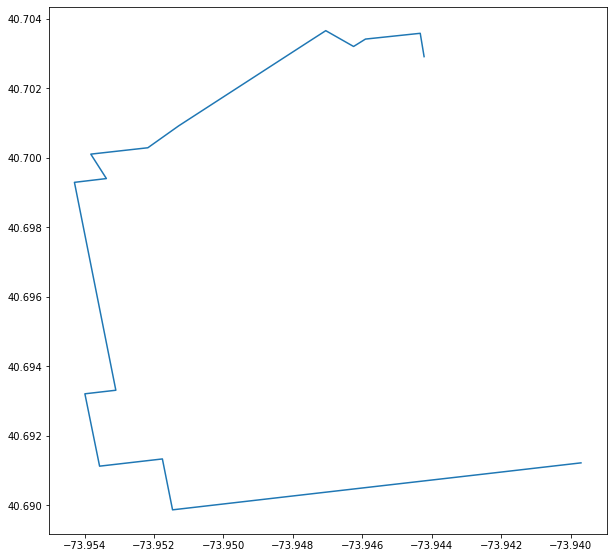

In [60]:
route_geom.plot(figsize = (10,10));

## Printing the route/edge using the bbox of the route_geom

In [33]:
bounding_box = route_geom.envelope
df = gpd.GeoDataFrame(gpd.GeoSeries(bounding_box), columns=['geometry'])

In [45]:
df['bbox'] = 1

In [42]:
df.crs = {'init': 'epsg:4326'}

In [46]:
join_left_df = gpd.sjoin(lion_shp, df, how="left")

In [48]:
join_left_df['bbox'].value_counts()

1.0    478
Name: bbox, dtype: int64

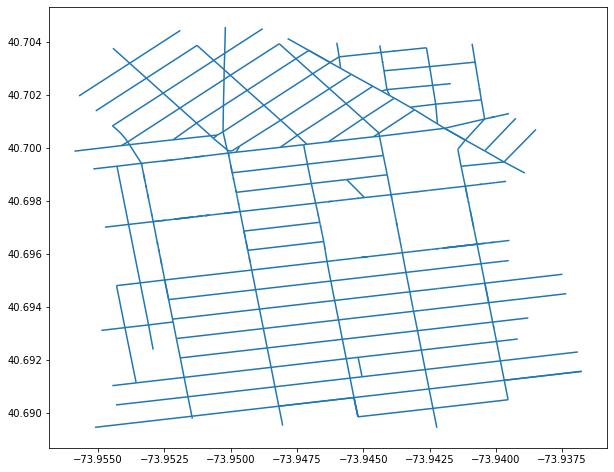

In [51]:
join_left_df.loc[join_left_df['bbox'] == 1].plot(figsize = (10,10))

## Overlaying the route on top of the edge lines

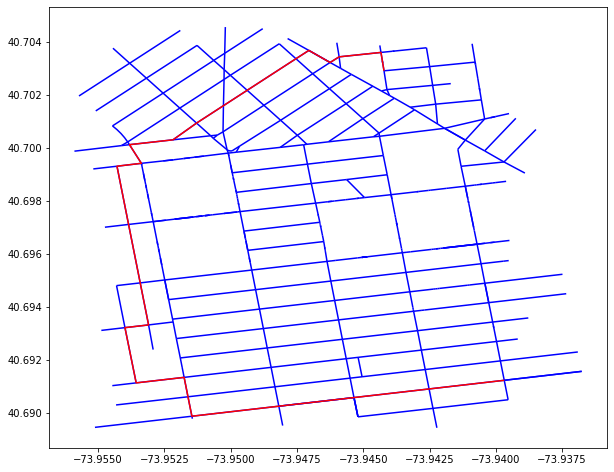

In [55]:
base = join_left_df.loc[join_left_df['bbox'] == 1].plot(figsize = (10,10), color = 'blue')
route_geom.plot(ax=base, color='red');

# Why did networkx's shortest_path api find this route in red when there appears to be a more direct route?